In [8]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(43905720)

mu_true = 0.0
sig2_true = 1.0
sig_true = np.sqrt(sig2_true)

# Monte Carlo parameters
R = 2000
ns = [20, 100, 500]  # sample sizes to test


In [9]:
def sim_lognormal(n, mu, sig, rng):
    y = rng.normal(mu, sig, size=n)
    x = np.exp(y)
    return x

# returns array of MLEs
def mles(x):
    y = np.log(x)
    mu_hat = y.mean()
    sig2_hat = ((y - mu_hat)**2).mean()
    return mu_hat, sig2_hat


In [ ]:
# Monte Carlo 
results = {}
for n in ns:
    mu_hats = np.empty(R)
    sig2_hats = np.empty(R)
    Zmu = np.empty(R)
    Zsig2 = np.empty(R)

    for r in range(R):
        x = sim_lognormal(n, mu_true, sig_true, rng)
        mu_hat, sig2_hat = mles(x)
        sig_hat = np.sqrt(sig2_hat)

        Zmu[r] = np.sqrt(n) * (mu_hat - mu_true) / sig_hat

        Zsig2[r] = np.sqrt(n) * (sig2_hat - sig2_true) / (np.sqrt(2.0) * sig2_hat)

        mu_hats[r] = mu_hat
        sig2_hats[r] = sig2_hat
        
    results[n] = {
        "mu_hats": mu_hats,
        "sig2_hats": sig2_hats,
        "Zmu": Zmu,
        "Zsig2": Zsig2,
        "corr_mu_sig2": np.corrcoef(mu_hats, sig2_hats)[0,1],
    }


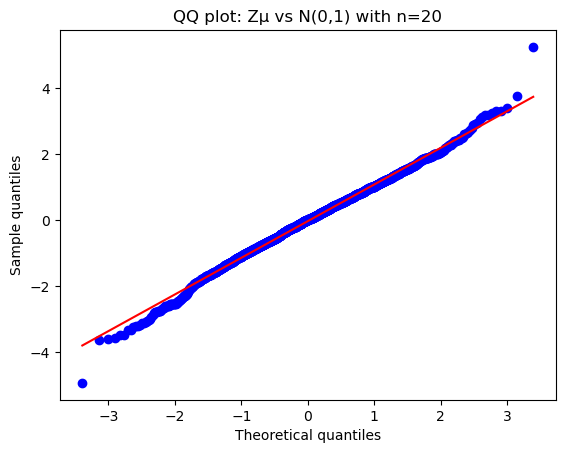

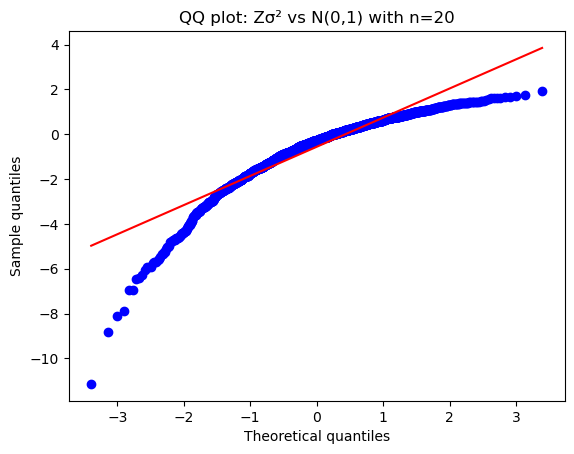

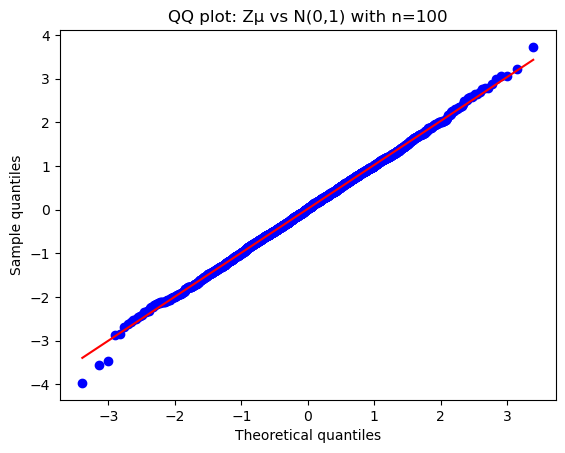

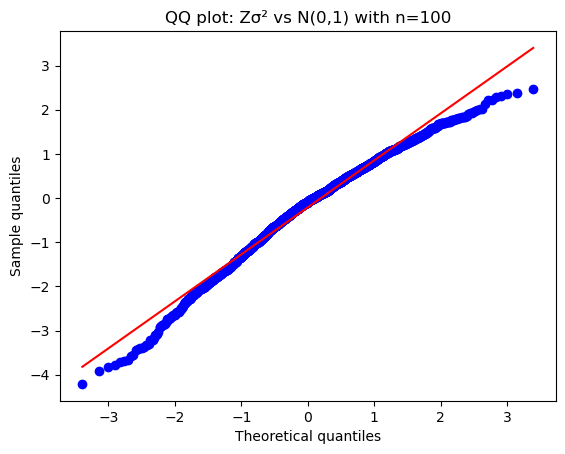

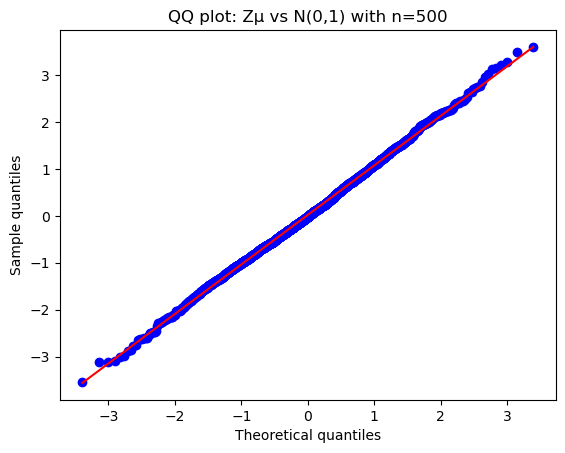

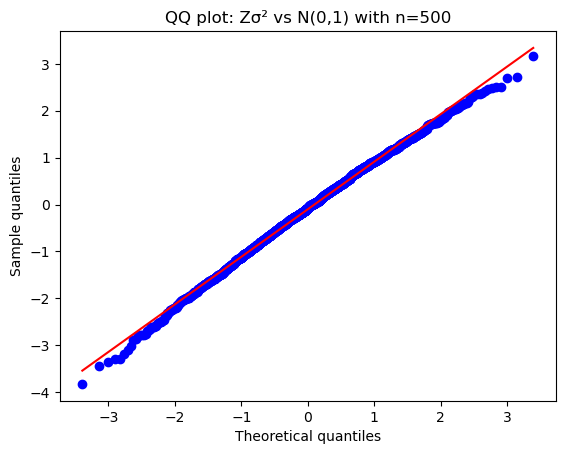

In [14]:
# Full disclosure, this Q-Q Plotting was modified from the following stack exchange post: 
# https://stackoverflow.com/questions/13865596/quantile-quantile-plot-using-scipy
import pylab
import scipy.stats as stats

for n in ns:
    Zmu = results[n]["Zmu"]
    Zsig2 = results[n]["Zsig2"]

    # For Z_mu
    plt.figure()
    stats.probplot(Zmu, dist="norm", plot=pylab)
    plt.title(f"QQ plot: Zμ vs N(0,1) with n={n}")
    plt.xlabel("Theoretical quantiles"); plt.ylabel("Sample quantiles")
    plt.show()

    # For Z_sigma^2
    plt.figure()
    stats.probplot(Zsig2, dist="norm", plot=pylab)
    plt.title(f"QQ plot: Zσ² vs N(0,1) with n={n}")
    plt.xlabel("Theoretical quantiles"); plt.ylabel("Sample quantiles")
    plt.show()




In [16]:
print("Empirical corr(mu_hat, sigma2_hat):")
for n in ns:
    c = results[n]["corr_mu_sig2"]
    print("n =", n, "corr =", round(c, 4))


Empirical corr(mu_hat, sigma2_hat):
n = 20 corr = 0.0146
n = 100 corr = 0.0006
n = 500 corr = 0.0386
